Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file.

In [141]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import chap01soln
resp = chap01soln.ReadFemResp()

Make a PMF of <tt>numkdhh</tt>, the number of children under 18 in the respondent's household.

In [142]:
resp_numkdhh = resp.numkdhh
resp_numkdhh_vc = resp_numkdhh.value_counts().sort_index()
print resp_numkdhh_vc
resp_numkdhh_pmf_original = resp_numkdhh_vc / len(resp_numkdhh)

0    3563
1    1636
2    1500
3     666
4     196
5      82
dtype: int64


Display the PMF.

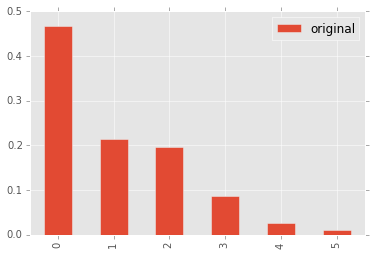

In [143]:
resp_numkdhh_pmf_original.plot(kind = 'bar', legend = True, label= 'original')

Define <tt>BiasPmf</tt>.

In [132]:
def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

Make a the biased Pmf of children in the household, as observed if you surveyed the children instead of the respondents.

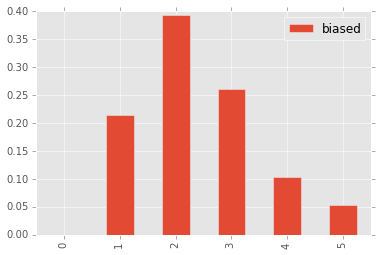

In [144]:
import pandas as pd
resp_numkdhh_pmf_biased = pd.DataFrame()
biased_list = [ index * row for index, row in resp_numkdhh_pmf_original.iteritems()]
resp_numkdhh_pmf_biased = resp_numkdhh_pmf_biased.append( biased_list)
resp_numkdhh_pmf_biased.columns = ['biased']
resp_numkdhh_pmf_biased.plot(kind = 'bar')

Display the actual Pmf and the biased Pmf on the same axes.

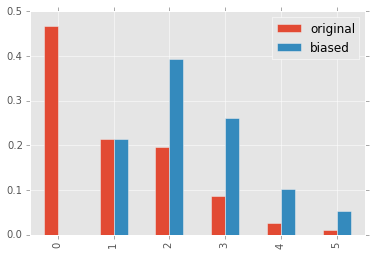

In [157]:
resp_numkdhh_pmf_original = pd.DataFrame(resp_numkdhh_pmf_original, columns=['original'])
resp_numkdhh_pmf = resp_numkdhh_pmf_original
resp_numkdhh_pmf['biased'] = resp_numkdhh_pmf_biased.biased
resp_numkdhh_pmf.plot(kind='bar')

Compute the means of the two Pmfs.

In [166]:
resp_numkdhh_pmf

,original,biased
0,0.466178,0.000000
1,0.214052,0.214052
2,0.196258,0.392516
3,0.087139,0.261416
4,0.025644,0.102578
5,0.010729,0.053644


In [168]:
resp_numkdhh_pmf_biased.sum()

biased    1.024205
dtype: float64

In [172]:
sum([row * index for index, row in resp_numkdhh_pmf.biased.iteritems()])

2.4618605259714772